# Healthcare & Medical Analytics
### Individual Assignment - Konstantinos Paganopoulos
##### "The relationship between gender and seasonal allergies; influence by socioeconomic factors"

First we load the necessary libraries.

In [1]:
import string
import pyreadr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

Then we load and visually inspect our data set.

In [2]:
data_orig = pyreadr.read_r('21600-0022-Data.rda')

In [3]:
data_orig = data_orig['da21600.0022']
data_orig

,AID,IMONTH4,IDAY4,IYEAR4,BIO_SEX4,VERSION4,BREAK_Q,PRYEAR4,PRETEST4,PRISON4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,57101310,(05) (5) May,6.0,2008.0,(2) (2) Female,V5.4,NO,2001.0,(0) (0) Not a pretest interview,(0) (0) Not a prison interview,...,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(2) (2) Rural town,(1) (1) Very safe
1,57103869,(05) (5) May,22.0,2008.0,(1) (1) Male,V5.4,NO,2002.0,(0) (0) Not a pretest interview,(0) (0) Not a prison interview,...,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,"(4) (4) Urban, residential only",(1) (1) Very safe
2,57109625,(11) (11) November,2.0,2008.0,(1) (1) Male,V5.5,NO,2002.0,(0) (0) Not a pretest interview,(0) (0) Not a prison interview,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57111071,(06) (6) June,29.0,2008.0,(1) (1) Male,V5.4,NO,2001.0,(0) (0) Not a pretest interview,(0) (0) Not a prison interview,...,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(1) (1) Rural farm,(2) (2) Moderately safe
4,57113943,(11) (11) November,11.0,2008.0,(1) (1) Male,V5.5,NO,2002.0,(0) (0) Not a pretest interview,(0) (0) Not a prison interview,...,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,"(5) (5) 3 or more commercial properties, mostl...",(3) (3) Moderately unsafe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,99719930,(06) (6) June,7.0,2008.0,(2) (2) Female,V5.4,NO,2001.0,(0) (0) Not a pretest interview,(0) (0) Not a prison interview,...,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(1) (1) Selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,"(4) (4) Urban, residential only",(2) (2) Moderately safe
5110,99719939,(02) (2) February,13.0,2008.0,(1) (1) Male,V5.1,NO,2001.0,(0) (0) Not a pretest interview,(0) (0) Not a prison interview,...,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(3) (3) Suburban,(2) (2) Moderately safe
5111,99719970,(03) (3) March,22.0,2008.0,(1) (1) Male,V5.2,NO,1996.0,(0) (0) Not a pretest interview,(0) (0) Not a prison interview,...,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(1) (1) Selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,"(4) (4) Urban, residential only",(3) (3) Moderately unsafe
5112,99719976,(04) (4) April,1.0,2008.0,(2) (2) Female,V5.2,NO,2001.0,(0) (0) Not a pretest interview,(0) (0) Not a prison interview,...,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(0) (0) Not selected,(3) (3) Suburban,(2) (2) Moderately safe


We then choose the variables that we are interested in.

In [4]:
data_new = data_orig[['H4ID9F','BIO_SEX4','H4ID5I','H4CJ1','H4SE32','H4GH8','H4EC7','H4IR4']]

After that we give our variables appropriate names.

In [5]:
data_new = data_new.rename(columns ={'H4ID9F':'allergies','BIO_SEX4':'gender','H4ID5I':'stress','H4CJ1':'arrested','H4SE32':'rape','H4GH8':'nutrition','H4EC7':'assets','H4IR4':'ethnicity'})

Then we clean our data by removing any special characters from the columns needed.

In [6]:
columns = ['allergies','gender','stress','arrested','rape','ethnicity']

for i in columns:
    for j in string.punctuation:
        data_new[i] = data_new[i].str.lstrip(' ')
        data_new[i] = data_new[i].str.replace('\d+','')
        data_new[i] = data_new[i].astype(str).str.replace(j,'')

Afterwards, we prepare our data. First, we pick the variables that we need to use in our model and drop "NaN" values.

In [7]:
data = data_new[['allergies','gender','stress','arrested','rape','nutrition','assets','ethnicity']]
data = data.dropna()

Let's now reduce the number of categories of some of our categorical variables. We reduce the dimension of the fast-food consumption variable from 8 to 3, and classify the nutrition as "healthy", "normal" and "unhealthy". We also reduce the dimension of total assets besides homes variable from 9 to 3, "poor", "normal" and "wealthy". Moreover, we rename our categories of our ethnicity variable so as to have shorter names.

In [8]:
for i in range(len(data['nutrition'])):
    if data['nutrition'].iloc[i] == 0:
        data['nutrition'].iloc[i] = 'healthy'
    elif data['nutrition'].iloc[i] == 1 or data['nutrition'].iloc[i] == 2:
        data['nutrition'].iloc[i] = 'normal'
    else: 
        data['nutrition'].iloc[i] = 'unhealthy'
              
mapping = {'(1) (1) Less than $5,000': 'poor', '(2) (2) $5,000 to $9,999': 'poor', '(3) (3) $10,000 to $24,999': 'normal', '(4) (4) $25,000 to $49,999': 'normal', '(5) (5) $50,000 to $99,999': 'wealthy','(6) (6) $100,000 to $249,999': 'wealthy','(7) (7) $250,000 to $499,999': 'wealthy','(8) (8) $500,000 to $999,999': 'wealthy','(9) (9) $1,000,000 or more': 'wealthy'}
data['assets'] = data.assets.map(mapping)

mapping2 = {'White': 'white', 'Black or African American': 'black', 'Asian or Pacific Islander': 'asian', 'American Indian or Alaska Native': 'indian'}
data['ethnicity'] = data.ethnicity.map(mapping2)

C:\Users\fdt\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Now, in order to deal with perfect multicolinearity issues, after we create dummy variables for each of the categories of our categorical variables, we drop one column.

In [9]:
# remove allergies from our list so as not to create a dummy for it
columns = list(data.columns)
columns.pop(0)

# deal with perfect multicolinearity
model = pd.get_dummies(data, columns = columns, drop_first = True)

We remove "NaN" dummy columns and we visually inspect our final data for our model.

In [10]:
model = model.drop(['arrested_nan'], axis = 1) 
model = model.drop(['rape_nan'], axis = 1) 
model

,allergies,gender_Male,stress_Yes,arrested_Yes,rape_Yes,nutrition_normal,nutrition_unhealthy,assets_poor,assets_wealthy,ethnicity_black,ethnicity_indian,ethnicity_white
0,No,0,0,0,0,0,1,0,0,1,0,0
1,No,1,0,1,1,0,1,1,0,1,0,0
2,No,1,0,1,0,1,0,0,0,0,0,1
3,No,1,0,0,0,1,0,0,0,0,0,1
4,No,1,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5108,No,0,0,0,0,1,0,0,0,0,0,1
5109,No,0,0,0,0,0,1,1,0,1,0,0
5110,Yes,1,0,0,0,0,1,1,0,1,0,0
5112,No,0,0,0,0,0,1,1,0,0,0,1


We store the final data for our model in a csv file for future purposes.

In [11]:
model.to_csv('data_model.csv')

Lastly, we visually inspect our final data for our descriptive statistics and store them in a csv file for future analysis.

In [12]:
data.to_csv('data_eda.csv')
data

,allergies,gender,stress,arrested,rape,nutrition,assets,ethnicity
0,No,Female,No,No,No,unhealthy,normal,black
1,No,Male,No,Yes,Yes,unhealthy,poor,black
2,No,Male,No,Yes,No,normal,normal,white
3,No,Male,No,No,No,normal,normal,white
4,No,Male,No,Yes,No,normal,poor,black
...,...,...,...,...,...,...,...,...
5108,No,Female,No,No,No,normal,normal,white
5109,No,Female,No,No,No,unhealthy,poor,black
5110,Yes,Male,No,No,No,unhealthy,poor,black
5112,No,Female,No,No,No,unhealthy,poor,white


Let's now draw some descriptive statistics.

We choose the Mosaic plot from statsmodels, since it gives us statistical highlighting for the variances. In other words, it is a graphical method for visualizing data from two or more qualitative variables. It is the multidimensional extension of spineplots, which graphically display the same information for only one variable. It gives an overview of the data and makes it possible to recognize relationships between different variables. For example, independence is shown when the boxes across categories all have the same areas.

We now draw mosaic plots for several variables.

In [15]:
data.gender.value_counts()

Female    2468
Male      2089
Name: gender, dtype: int64

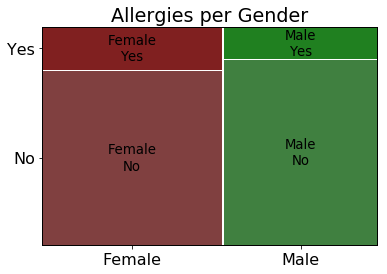

In [16]:
plt.rcParams['font.size'] = 16.0
pd.crosstab(data.allergies, data.gender)
ct = pd.crosstab(data.allergies, data.gender)
mosaic(ct.unstack(), gap = 0.006675, title = 'Allergies per Gender')
plt.show()

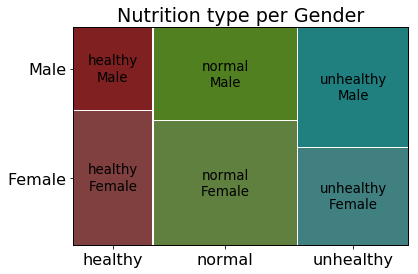

In [13]:
plt.rcParams['font.size'] = 16.0
pd.crosstab(data.gender, data.nutrition)
ct = pd.crosstab(data.gender, data.nutrition)
mosaic(ct.unstack(), title = 'Nutrition type per Gender')
plt.show()

Hence, since the area for unhealthy nutrition for men is larger than that of women and vice versa, we can conclude that men have on average an unhealthier nutrition in comparison with that of women.

We can see that female are more prone to seasonal allergies than men.

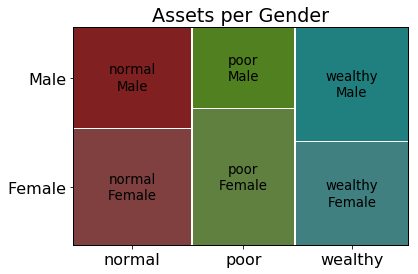

In [18]:
plt.rcParams['font.size'] = 16.0
pd.crosstab(data.gender, data.assets)
ct = pd.crosstab(data.gender, data.assets)
mosaic(ct.unstack(), gap = 0.006675, title = 'Assets per Gender')
plt.show()

Lastly, we can clearly see that females have on average a lower number of total assets (bank accounts, retirement plans and stocks) in comparison with men, who own more.